$$\quad$$

이름: 최정우

학번: M2018076

Colab link: http://bit.ly/2vnWSEn

# [overfitting; 10p]  다음 코드를 실행하고 결과를 해석하세요.

## 추가. 라이브러리 및 기본코드

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 추가--------------------------------
np.random.seed(seed=1)
X_min = 4 
X_max = 30
X_n = 16
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2]
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
+ 4 * np.random.randn(X_n)

# 선형 기저 함수 모델 추정 -----------------
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

# 가우스 함수 ---------------------------------
def gauss(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))

# 선형 기저 함수 모델 MSE ----------------
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t)**2)
    return mse

# 선형 기저 함수 모델 ----------------
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x) # x와 같은 크기로 요소가 0의 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

# 가우스 기저 함수 표시 -----------------------
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)
    

## A. 코드

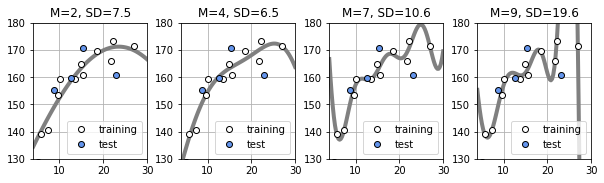

In [0]:
# 라이브러리 생략
X_test = X[:int(X_n / 4 +1)]
T_test = T[:int(X_n / 4 +1)]
X_train = X[int(X_n / 4 +1):]
T_train = T[int(X_n / 4 +1):]

plt.figure(figsize=(10, 2.5))

plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i +1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o',
            linestyle='None', color='white',
            markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker='o',
            linestyle='None', color='cornflowerblue',
            markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse= mse_gauss_func(X_test, T_test, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()


### 결과 해석



M이 4까지 증가 할때까지는 오차(SD)값이 감소하지만 그보다 커지면 오버피팅 되어 test set에 대한 오차는 점차 커지는것을 확인 할 수 있다.

## B. 코드

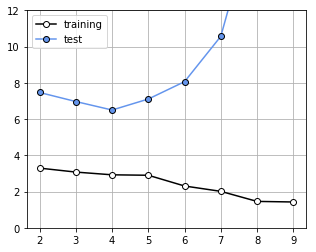

In [0]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))

M = range(2,10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))

for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
    
plt.plot(M, mse_train, marker='o', linestyle='-', 
         markerfacecolor='white', markeredgecolor='black', 
         color='black', label='training')
plt.plot(M, mse_test, marker='o', linestyle='-', 
         color='cornflowerblue', markeredgecolor='black', 
          label='test')

plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
    
plt.show()

### 결과해석

M의 크기에 따른 훈련집합과 테스트집합에 대한 오차의 경향성을 가시화한 그래프이다.

훈련집합에 대한 오차는 M의 크기가 커질수록 점차 작아지지만 테스트집합에 대한 오차는 M=4일때 최저값을 가지고 그 이후부터는 급격하게 증가하는것을 확인할수 있다.

# [linear model; 20p] 

## logistic regression의 $\nabla E_{in}(\mathbf{w}) = \frac{1}{N} \sum^{N}_{n=1} -y_{n}\mathbf{x}_{n}\theta(-y_{n} \mathbf{w}^{T} \mathbf{x}_{n})$임을 보이고, 이는 오분류된 것이 정확하게 분류된 것보다 경사에 더 큰 기여를 함을 설명하세요.

### 풀이

Logistic regression 의 in-sample error는 다음과 같다.

$$ E_{in}(\mathbf{w}) = \frac{1}{N} \sum^{N}_{n=1} ln (1+e^{-y_{n} \mathbf{w}^{T} \mathbf{x}_{n}})$$

이를 미분하면 $ln$과 합성함수의 미분법으로 계산하면,

$$ \nabla E_{in}(\mathbf{w}) = \frac{1}{N} \sum^{N}_{n=1} {{1}\over{ (1+e^{-y_{n} \mathbf{w}^{T} \mathbf{x}_{n}})}}  (1+e^{-y_{n} \mathbf{w}^{T} \mathbf{x}_{n}})^{\prime}$$

$$ = \frac{1}{N} \sum^{N}_{n=1} {{1}\over{ (1+e^{-y_{n} \mathbf{w}^{T} \mathbf{x}_{n}})}}  ({-y_{n} \mathbf{x}_{n}}e^{-y_{n} \mathbf{w}^{T} \mathbf{x}_{n}})$$

가 된다.

$$\therefore \nabla E_{in}(\mathbf{w}) = \frac{1}{N} \sum^{N}_{n=1} -y_{n} \mathbf{x}_{n}\theta(-y_{n} \mathbf{w}^{T} \mathbf{x}_{n})$$

$$\because \theta(s) = {{e^s}\over{1+e^s}} = {{1}\over{1+e^{-s}}}$$

다음으로 경사에 기여도에 대해 정리하면 다음과 같다.

먼저 주어진 라벨이 $y_n = +1$이라 가정하자.
오분류를 가정하였기 때문에, $\mathbf{w}^{T} \mathbf{x}_{n} = -1$이 된다.
따라서 $-y_{n} \mathbf{w}^{T} \mathbf{x}_{n} = 1$이 된다.

$\theta(s)$의 그래프는 Fig 1.과  같으므로, $\theta(-y_{n} \mathbf{w}^{T} \mathbf{x}_{n}) = \theta(1)$ 은 0.5보다 큰 값을 가지게 된다.

![Fig 1. Logistic graph](320px-Logistic-curve.svg.png)

반대로 데이터가 제대로 분류가 되었다면 $\mathbf{w}^{T} \mathbf{x}_{n} = +1$이 된다.
따라서 $\theta(-y_{n} \mathbf{w}^{T} \mathbf{x}_{n}) = \theta(-1)$ 이 되고 0.5보다 작은 값을 가지게된다.

따라서 오분류 된값이 정확하게 분류된 값보다 더 큰 경사도를 가지게 된다.

# [logistic regression; 25p]

## 다음 코드를 실행하고 결과를 해석하세요.

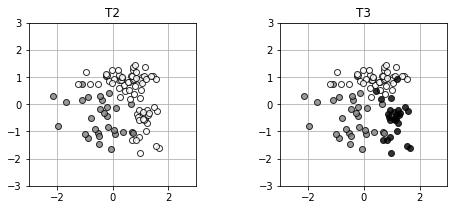

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1) # 난수 시드 고정
N = 100 # 데이터의 수
K = 3 # 분포 수
T3 = np.zeros((N,3), dtype=np.uint8) # 3클래스의 라벨데이터 (0,1,2)
T2 = np.zeros((N,2), dtype=np.uint8) # 2클래스의 라벨데이터 (0,1)
X = np.zeros((N,2)) # 입력데이터
X_range0 = [-3, 3] # X0 범위
X_range1 = [-3, 3] # X1 범위

Mu = np.array ([[-.5, -.5] , [.5, 1.0], [1, -.5]]) # 분포의 평균(중심)
Sig = np.array ([[0.7, 0.7],[0.8, 0.3],[0.3, 0.8]]) # 분포의 분산
Pi = np.array ([0.4, 0.8, 1]) # 각 분포에 대한 비율

# 데이터 생성
for n in range (N): 
    wk = np.random.rand()
    for k in range(K): 
        if wk < Pi[k]: 
            T3[n, k] = 1 
            break 
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n,:] == 1, k] + Mu[T3[n, :] == 1, k])

T2[:,0] = T3[:, 0] # T3의 0번째 클래스로 T2의 1번째 클래스를 만든다.
T2[:,1] = T3[:, 1] | T3[:, 2] # T3의 클래스 1,2를 합쳐서 T2의 2번째 클래스를 만든다.

def show_data2 (x, t): 
    wk, K = t.shape 
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]] 
    for k in range (K): 
        plt.plot (x[t[:, k] == 1, 0], x[t[:, k] == 1, 1], 
                  linestyle = 'none', markeredgecolor = 'black', 
                  marker = 'o', color = c[k], alpha = 0.8) 
        plt.grid (True) 
plt.figure(figsize=(7.5, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title("T2")

plt.subplot(1, 2, 2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title("T3")
plt.show()


### 결과해석



데이터 분포를 가시화하는 코드다.
데이터는 0~1 사이의 균일한 분포에서 난수를 생성해 wk에 넣는다.
생성된 난수를 Pi 에 따라서 클래스를 분류한다.
각 클래스마다 각각 다른 가우스 분포로 입력하여 입력데이터를 생성한다.

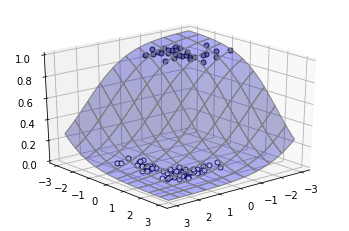

In [0]:
# 로지스틱 회귀 모델
def logistic2(x0, x1, w): 
    y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2]))) 
    return y 

from mpl_toolkits.mplot3d import axes3d 
from scipy.optimize import minimize 

def show3d_logistic2(ax, w): 
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn) 
    x1 = np.linspace(X_range1[0], X_range1[1], xn) 
    xx0, xx1 = np.meshgrid(x0, x1) 
    y = logistic2(xx0, xx1, w) 
    ax.plot_surface(xx0, xx1, y, color = 'blue', edgecolor = 'gray',
                     rstride = 5, cstride = 5, alpha = 0.3)
    

def show_data2_3d(ax, x, t ): 
    c = [[.5, .5, .5], [1, 1, 1]] 
    for i in range (2): 
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1-i, 
                marker = 'o', color = c[i], markeredgecolor = 'black',
                linestyle = 'none', markersize = 5, alpha = 0.8) 
    Ax.view_init(elev = 25, azim = 50)

Ax = plt.subplot(1,1,1, projection='3d')
W = [-1,-1,-1]
show3d_logistic2(Ax,W)
show_data2_3d(Ax,X, T2)


### 결과해석



W = [-1, -1, -1] 로 했을 때의 2차원 로지스틱 회귀모델과 데이터를 3차원으로 표기한다.

클래스에 따라서 두 데이터가 0또는 1로 분리됨을 확인할 수 있다.

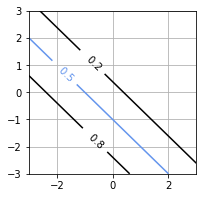

In [0]:

def show_contour_logistic2(w): 
    xn = 30 
    x0 = np.linspace(X_range0[0], X_range0[1], xn) 
    x1 = np.linspace(X_range1[0],X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1) 
    y = logistic2(xx0, xx1, w) 
    cont = plt.contour(xx0, xx1, y, levels = (0.2, 0.5, 0.8), 
                        colors = ['k' , 'cornflowerblue', 'k']) 
    cont.clabel(fmt = '% 1.1f', fontsize = 10) 
    plt.grid(True) 

plt.figure(figsize = (3,3))
W = [-1,-1,-1]
show_contour_logistic2(W)


### 결과해석



W = [-1, -1, -1] 로 했을 때의 2차원 로지스틱 회귀모델의 출력이 등고선 형태로 표기된다.

In [0]:
# 크로스 엔트로피 오차
def cee_logistic2(w, x, t): 
    X_n = x.shape[0] 
    y = logistic2(x[:, 0], x[:, 1], w) 
    cee = 0 
    for n in range(len(y)): 
        cee = cee - (t[n, 0] * np.log(y[n]) + 
                     (1-t[n, 0]) * np.log(1 - y[n])) 
    cee = cee / X_n 
    return cee 

# 크로스 엔트로피 오차의 미분
def dcee_logistic2(w, x, t): 
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[: , 1], w) 
    dcee = np.zeros(3)
    for n in range (len (y)): 
        dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0] 
        dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1] 
        dcee[2] = dcee[2] + (y[n] - t[n, 0]) 
    dcee = dcee / X_n 
    return dcee 

W = [-1,-1,-1]
dcee_logistic2(W, X, T2)

array([ 0.10272008,  0.04450983, -0.06307245])

### 결과해석



크로스 엔트로피 오차 함수는 다음 수식을 통해서 구성한다.
$$ CEE(w) =  -\frac{1}{N} \sum_{n=0}^{N-1}{t_nlogy_n + (1-t_n)log(1-y_n)}$$

위 함수의 매개변수별 편미분을 구하면 다음과 같은 수식을 얻을수 있다.

$$ {{\partial CEE(w)}\over{\partial w_0}} = \frac{1}{N} \sum_{n=0}^{N-1}{(y_n - t_n) x_0}$$
$$ {{\partial CEE(w)}\over{\partial w_1}} = \frac{1}{N} \sum_{n=0}^{N-1}{(y_n - t_n) x_1}$$
$$ {{\partial CEE(w)}\over{\partial w_2}} = \frac{1}{N} \sum_{n=0}^{N-1}{(y_n - t_n) }$$

dcee_logistic2 함수를 통해서 W = [-1, -1, -1] 일때의 편미분값을 구할 수 있다.

w0 = -3.70, w1 = -2.54, w2 = -0.28
CEE =  0.22


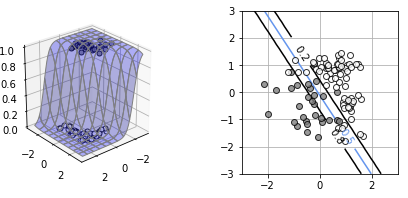

In [0]:
from scipy.optimize import minimize

# 로지스틱 회귀모델의 매개변수 검색
def fit_logistic2(w_init, x, t): 
    res = minimize(cee_logistic2, w_init, args = (x, t),
                   jac = dcee_logistic2, method = "CG") 
    return res.x
        
plt.figure(1, figsize = (7, 3)) 
plt.subplots_adjust(wspace = 0.5) 

Ax = plt.subplot(1, 2, 1, projection = '3d') 
W_init = [-1, 0, 0] 
W = fit_logistic2(W_init, X, T2)
print("w0 = {0: .2f}, w1 = {1: .2f}, w2 = {2: .2f}". format (W[0], W[1], W[2])) 
show3d_logistic2(Ax, W)

show_data2_3d(Ax, X, T2) 
cee = cee_logistic2 (W, X, T2) 
print("CEE = {0: .2f}".format(cee))

Ax = plt.subplot (1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W) 
plt.show() 


### 결과해석



평균 크로스엔트로피 오차가 최소가 되도록 로지스틱 회귀모델의 매개변수를 구하고 그 결과를 가시화한다.

scipy library에서 제공되는 minimize 최적화 함수를 통해서 찾은 매개변수는 다음과 같다.

$$w0 = -3.70,~ w1 = -2.54,~ w2 = -0.28$$

사용한 minimize 최적화 함수는 미분함수(자코비안)을 통해 Conjugate Gradient Method으로  최소의 오차를 가지는 매개변수를 찾는 방법입니다.

왼쪽 그림은 로지스틱 회귀 모델의 3차원 가시화이고 오른쪽그림은 그 모델의 결정직선을 표시한 그림입니다.
오른쪽그림에서 파란선을 기점으로 클래스의 분류가 일어 나는것을 확인할수 있습니다.



# [bias-variance tradeoff; 20p] 

## 데이터가 $y(x) = f(x) +\epsilon$ ( $\epsilon~$는 평균 0, 분산은 $\sigma^2$인 잡음)인 잡음이 포함되어 있을 때, $E_{out}(g^{(D)}) = \mathbb{E}_{x,y}[\big{(}(g^{(D)}(x) - y(x) \big{)}^2]$부터 다음의 bias-variance tradeoff 식을 유도하세요.

$$\mathbb{E}_D[E_{out}(g^{(D)})] = \sigma^2 + bias + variance$$


### 풀이

주어진 $\mathbb{E}_{out}(g^{(D)})$ 는 다음과 같이 정리할수 있다.
\begin{align}
\mathbb{E}_D[E_{out}(g^{(D)})]
& = \mathbb{E}_D[\mathbb{E}_{x,y}[\big{(}(g^{(D)}(x) - y(x) \big{)}^2] ] \\
& = \mathbb{E}_D[\mathbb{E}_{x}[\big{(}(g^{(D)}(x) -  f(x) -\epsilon \big{)}^2] ] \\
& = \mathbb{E}_x[\mathbb{E}_{D}[\big{(}(g^{(D)}(x) -  f(x) -\epsilon \big{)}^2] ]
\end{align}

let focus on $\mathbb{E}_{D}[\big{(}(g^{(D)}(x) -  f(x) -\epsilon \big{)}^2]$

Average hypothesis $\bar{g}(x)$ 아래와 같이 정의한다.
$$ \bar{g}(x) \triangleq \mathbb{E}_D[E_{out}(g^{(D)})]$$

평균  $\bar{g}(x)$ 을 이용하면

\begin{align}
\mathbb{E}_{D}[\big{(}g^{(D)}(x) -  f(x) -\epsilon \big{)}^2]
& = \mathbb{E}_{D}[\big{(}g^{(D)}(x) -  f(x) -\epsilon \big{)}^2] \\
& = \mathbb{E}_{D}[g^{(D)}(x)^2 + f(x)^2 + \epsilon^2 - 2\bar{g}(x)f(x) -  2\epsilon f(x) -2\epsilon\bar{g}(x) ]\\
& = \mathbb{E}_{D}[g^{(D)}(x)^2 - \bar{g}(x)^2 +\bar{g}(x)^2 + f(x)^2 + \epsilon^2 - 2\bar{g}(x)f(x) +  2\epsilon f(x) -2\epsilon\bar{g}(x)] \\
& = \mathbb{E}_{D}[g^{(D)}(x)^2 - \bar{g}(x)^2] +\mathbb{E}_{D}[\bar{g}(x)^2 + f(x)^2 + \epsilon^2 - 2\bar{g}(x)f(x) +  2\epsilon f(x) -2\epsilon\bar{g}(x)] \\
& = \mathbb{E}_{D}[g^{(D)}(x)^2 - \bar{g}(x)^2] +\bar{g}(x)^2 + f(x)^2 - 2\bar{g}(x)f(x) + \mathbb{E}_{D}[\epsilon^2 +  2\epsilon f(x) -2\epsilon\bar{g}(x)] \\
& = \mathbb{E}_{D}[g^{(D)}(x)^2 - \bar{g}(x)^2] + \big{(}\bar{g}(x) -  f(x) \big{)}^2 + \mathbb{E}_{D}[\epsilon^2] +  \mathbb{E}_{D}[2 \epsilon] \mathbb{E}_{D}[f(x) -\bar{g}(x)] \\
& = \mathbb{E}_{D}[g^{(D)}(x)^2 - \bar{g}(x)^2] + \big{(}\bar{g}(x) -  f(x) \big{)}^2 + \mathbb{E}_{D}[\epsilon^2] - \mathbb{E}_{D}[\epsilon] ^2 \\
& = \mathbb{E}_{D}[g^{(D)}(x)^2 - \bar{g}(x)^2] + \big{(}\bar{g}(x) -  f(x) \big{)}^2 + Var(\epsilon)\\
& = \mathbb{E}_{D}[g^{(D)}(x)^2 - \bar{g}(x)^2] + \big{(}\bar{g}(x) -  f(x) \big{)}^2 +\sigma^2
\end{align}
$$\because \bar{\epsilon } = 0 , Var(\epsilon) = \sigma^2$$

\begin{align}
\therefore \mathbb{E}_D[E_{out}(g^{(D)})] &= variance + bias +\sigma^2 \\
& = \mathbb{E}_{D}[g^{(D)}(x)^2 - \bar{g}(x)^2] + \big{(}\bar{g}(x) -  f(x) \big{)}^2 +\sigma^2
\end{align}

$$variance = \mathbb{E}_{D}[g^{(D)}(x)^2 - \bar{g}(x)^2] $$
$$bias = \big{(}\bar{g}(x) -  f(x) \big{)}^2 $$

# [regularization; 25p]  가중치 감쇠의 경우,

## A. $| \mathbf{w}_{reg}| \leq |\mathbf{w}_{lin}|$을 증명하세요. (Hint: $| \mathbf{w}_{reg}| > |\mathbf{w}_{lin}|$ 가정이 모순임을 보임)

### 증명

Regularization 이 없는 Linear regression 에서 in-sample error를 다음과 같이 정의할수 있다.

\begin{align}
E_{in}(\mathbf{w}) & = \frac{1}{N}\sum_{n=1}^{N}{(\mathbf{w}^T \mathbf{z}_n - y_n)^2}\\
& = \frac{1}{N}{(Z\mathbf{w}-\mathbf{y})^T (Z\mathbf{w}-\mathbf{y})}
\end{align}

이를 최소화하는 $\mathbf{w}_{lin}$ 은 다음과 같다.

$$ \mathbf{w}_{lin} = (Z^TZ)^{-1}Z^T\mathbf{y} $$

Regularization 이 적용된 Linear regression 에서 in-sample error를 다음과 같이 정의할수 있다.

$$ E_{in}(\mathbf{w}) = \frac{1}{N}{(Z\mathbf{w}-\mathbf{y})^T (Z\mathbf{w}-\mathbf{y})} $$

subject to:

$$ \mathbf{w}^T\mathbf{w} \leq C$$

$$ E_{aug}(\mathbf{w}) = E_{in}(\mathbf{w}) + \lambda _C \mathbf{w}^T\mathbf{w} $$

여기서 ${\lambda} _{C}$ 는 lagrange multiplier 로 양수 이다.

이를 최소화하는 $\mathbf{w}_{reg}$ 은 다음과 같다.

$$ \mathbf{w}_{reg} = (Z^TZ + \lambda I)^{-1}Z^T\mathbf{y} $$

둘의 크기 차이를 알아보기위해 서로 빼보면

\begin{align}
|\mathbf{w}_{reg}| - |\mathbf{w}_{lin}| &=  |(Z^TZ + \lambda I)^{-1}Z^T\mathbf{y}| - | (Z^TZ)^{-1}Z^T\mathbf{y}|\\
&= \big{(}|(Z^TZ + \lambda I)^{-1}| -  |(Z^TZ)^{-1}|\big{)}|Z^T\mathbf{y}|\\
&= \big{(}|(Z^TZ + \lambda I)^{-1}| (\lambda I)|(-Z^TZ)^{-1}|\big{)}|Z^T\mathbf{y}|\\
&= -\big{(}|(Z^TZ + \lambda I)^{-1}| (\lambda I)|(Z^TZ)^{-1}|\big{)}|Z^T\mathbf{y}|
\end{align}
$$\because A^{-1} + B^{-1} = A^{-1}(A+B){B^{-1}}$$
$$\therefore |\mathbf{w}_{reg}| - |\mathbf{w}_{lin}| \leq 0$$
$$| \mathbf{w}_{reg}| \leq |\mathbf{w}_{lin}|$$

$$\because \lambda \geq 0$$



## B. $\lambda > 0, E_{in}$가 미분 가능하면 아래의 두 식이 동일함을 보이세요.

$$ w(t+1) \leftarrow w(t) - \eta \nabla E_{aug}(w(t))$$
$$  = w(t+1) \leftarrow (1-2\eta \lambda ) w(t) - \eta \nabla E_{in}(w(t))$$


### 증명

주어진 두 식을 정리하면 다음과 같다.
$$\nabla E_{aug}(w(t)) =\nabla E_{in}(w(t))+ (2\lambda ) w(t)$$

이는 A.에서 정의한 다음식을 미분한 것과 같다.

$$ E_{aug}(\mathbf{w}) = E_{in}(\mathbf{w}) + \lambda _C \mathbf{w}^T\mathbf{w} $$

따라서 $E_{in}$ 이 미분가능하다면 위 두식은 동일하다.
